#### Fuzzy Adaptive Resonance Theory Classification on Synthetic Data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from ART import AdaptiveResonanceTheory, generate_test_data, complement_coding, create_contour_plot

##### 1. Display plots that illustrate a Fuzzy ART classification on linearly separable data

Iteration 1: 281 different clusters
Iteration 2: 111 different clusters
Iteration 3: 187 different clusters
Iteration 4: 77 different clusters
Iteration 5: 25 different clusters
Iteration 6: 16 different clusters
Iteration 7: 85 different clusters
Iteration 8: 72 different clusters
Iteration 9: 13 different clusters
Iteration 10: 7 different clusters
Iteration 11: 23 different clusters
Iteration 12: 67 different clusters
Iteration 13: 70 different clusters
Iteration 14: 36 different clusters
Iteration 15: 23 different clusters
Iteration 16: 33 different clusters
Iteration 17: 53 different clusters
Iteration 18: 32 different clusters
Iteration 19: 29 different clusters
Iteration 20: 22 different clusters
Iteration 21: 27 different clusters
Iteration 22: 14 different clusters
Iteration 23: 2 different clusters
Iteration 24: 4 different clusters
Iteration 25: 2 different clusters
Iteration 26: 3 different clusters
Iteration 27: 0 different clusters
              precision    recall  f1-sc

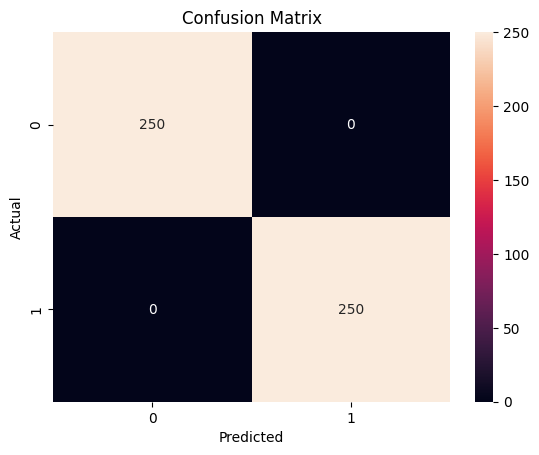

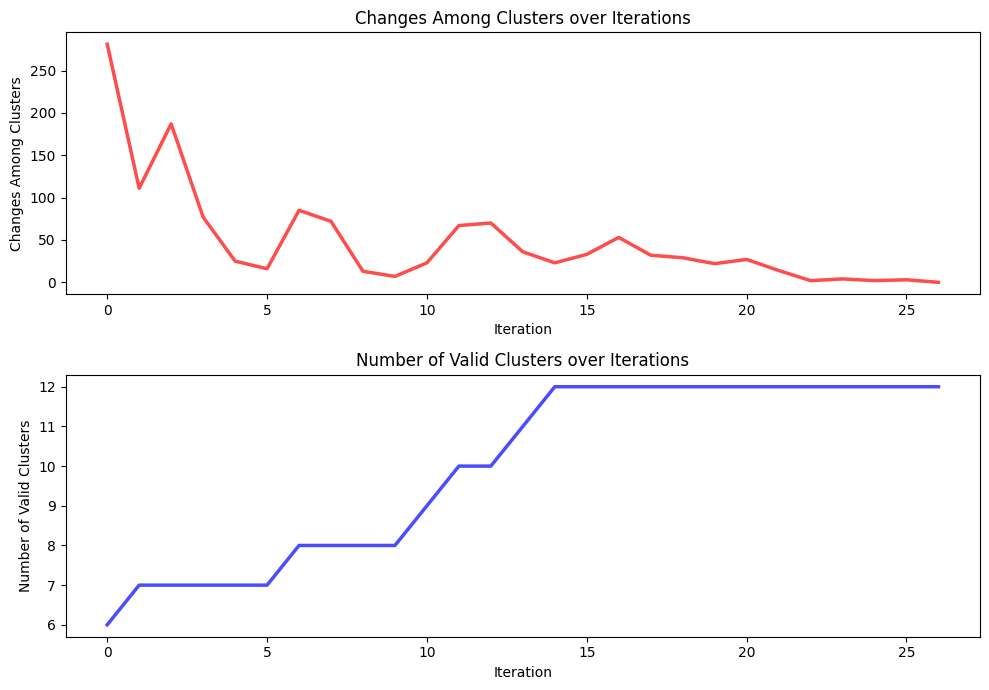

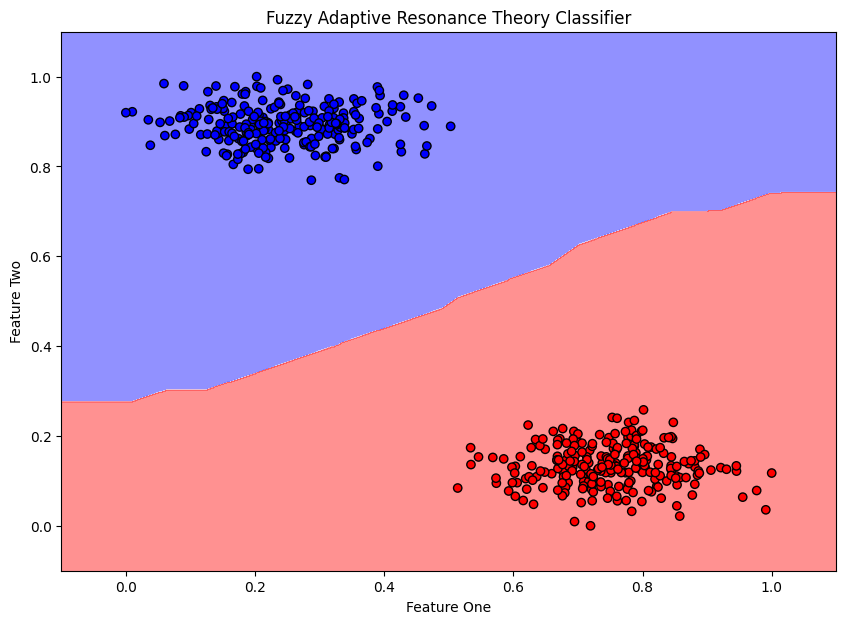

In [2]:
X, y = generate_test_data(n_samples=500, n_features=2, std=0.2)
art = AdaptiveResonanceTheory(
    learning_rate=0.1, 
    alpha=0.5, 
    epsilon=0.8
    )
art.fit(X, y)

# Predict the Classes Based on ART
pred_Y = art.predict(X)
art.predict_test(y, pred_Y)

# Plot the decision boundary and the true labels
create_contour_plot(art, X, y, resolution=500)

##### 2. Display plots that illustrate a Fuzzy ART classification on non-linearly separable data

Iteration 1: 313 different clusters
Iteration 2: 193 different clusters
Iteration 3: 45 different clusters
Iteration 4: 66 different clusters
Iteration 5: 63 different clusters
Iteration 6: 237 different clusters
Iteration 7: 108 different clusters
Iteration 8: 47 different clusters
Iteration 9: 37 different clusters
Iteration 10: 35 different clusters
Iteration 11: 32 different clusters
Iteration 12: 11 different clusters
Iteration 13: 9 different clusters
Iteration 14: 2 different clusters
Iteration 15: 2 different clusters
Iteration 16: 5 different clusters
Iteration 17: 6 different clusters
Iteration 18: 2 different clusters
Iteration 19: 0 different clusters
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       250
           1       0.96      0.97      0.96       250

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



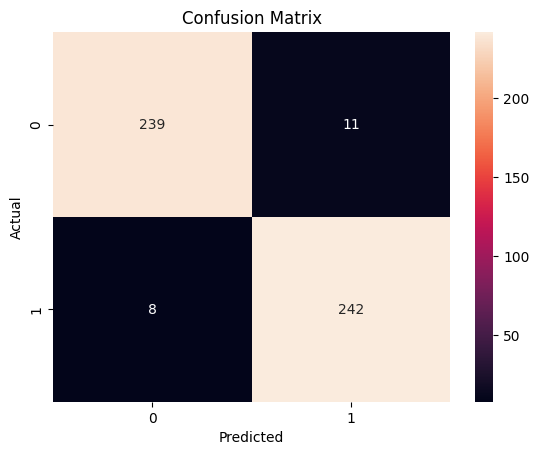

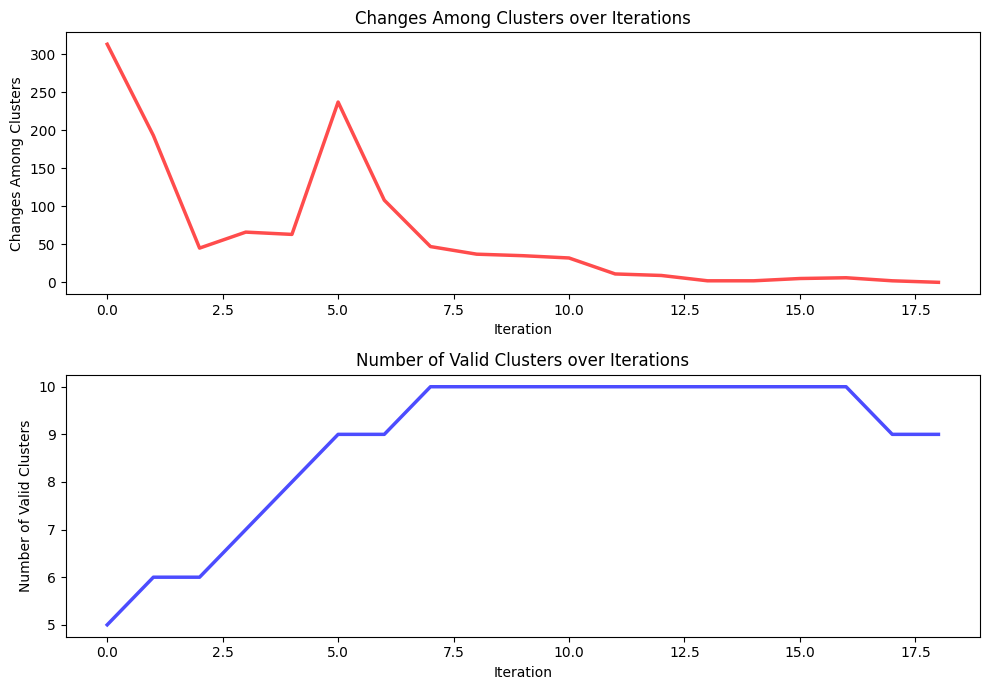

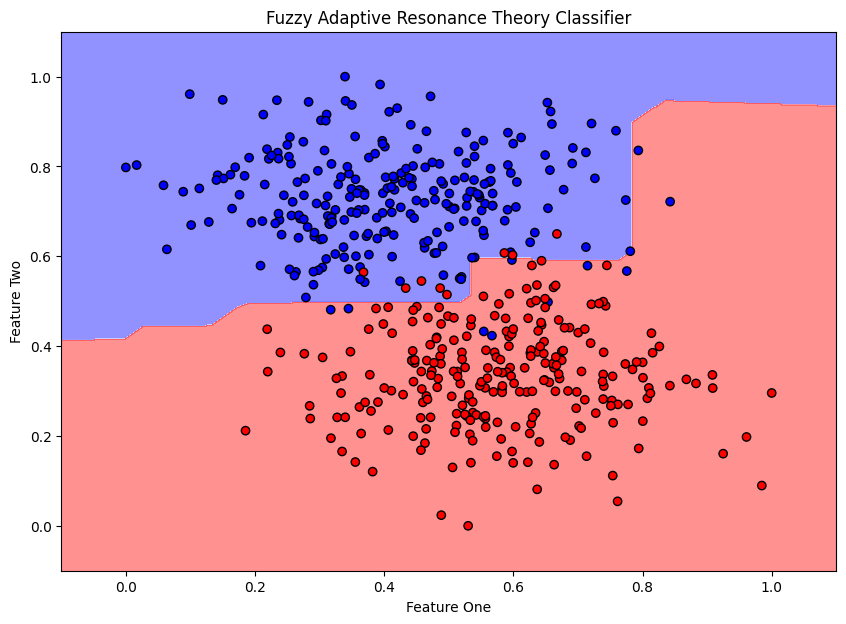

In [3]:
X, y = generate_test_data(n_samples=500, n_features=2, std=0.98)
art = AdaptiveResonanceTheory(
    learning_rate=0.1, 
    alpha=0.5, 
    epsilon=0.6
    )
art.fit(X, y)

# Predict the Classes Based on ART
pred_Y = art.predict(X)
art.predict_test(y, pred_Y)

# Plot the decision boundary and the true labels
create_contour_plot(art, X, y, resolution=500)

#### Fuzzy Adaptive Resonance Theory Classification on Marketing Target

In [4]:
# Load Data
market_data = pd.read_csv('./dataset/Social_Network_Ads.csv', header=0)

# Remove the First Column
market_data = market_data.drop(market_data.columns[0], axis=1)

# Training Set
train_X = market_data.iloc[0:300, 0:-1].values
train_Y = market_data.iloc[0:300:, -1].values

# Test Set
test_X = market_data.iloc[300:, 0:-1].values
test_Y = market_data.iloc[300:, -1].values

# Standardize the Features for Both Training Set and Test Set
scaler = StandardScaler()

train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Transpose the input data to get the form of (n_features, n_samples)
train_X = train_X.T
test_X = test_X.T

# Complement coding
train_X = complement_coding(train_X)
test_X = complement_coding(test_X)

Iteration 1: 258 different clusters
Iteration 2: 69 different clusters
Iteration 3: 34 different clusters
Iteration 4: 18 different clusters
Iteration 5: 13 different clusters
Iteration 6: 11 different clusters
Iteration 7: 25 different clusters
Iteration 8: 23 different clusters
Iteration 9: 22 different clusters
Iteration 10: 10 different clusters
Iteration 11: 5 different clusters
Iteration 12: 1 different clusters
Iteration 13: 6 different clusters
Iteration 14: 4 different clusters
Iteration 15: 5 different clusters
Iteration 16: 5 different clusters
Iteration 17: 0 different clusters
              precision    recall  f1-score   support

           0       0.85      0.92      0.89        38
           1       0.95      0.90      0.93        62

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



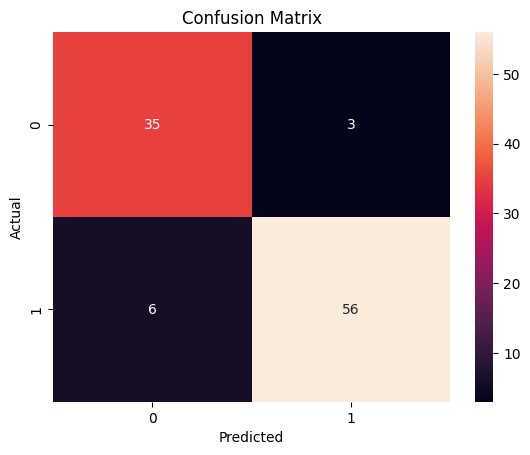

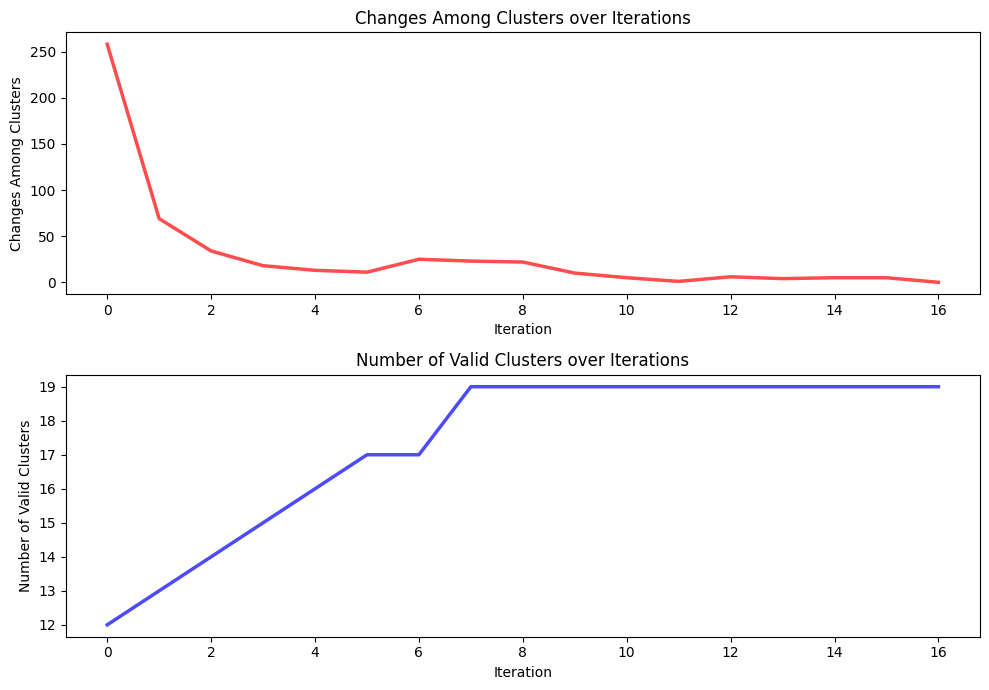

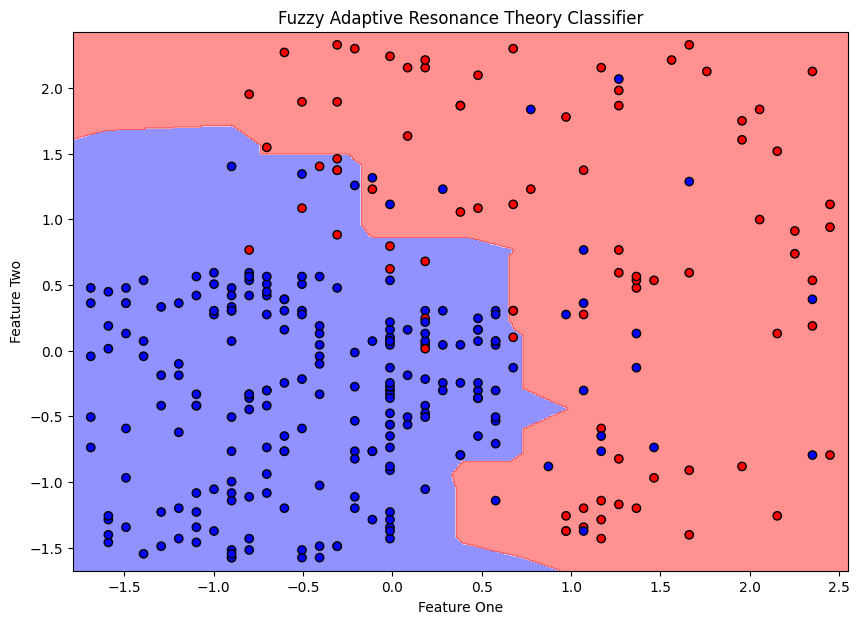

In [5]:
art = AdaptiveResonanceTheory(
    learning_rate=0.1, 
    alpha=0.1, 
    epsilon=0.1
    )
art.fit(train_X, train_Y)

# Predict the Classes Based on ART
pred_Y = art.predict(test_X)
art.predict_test(test_Y, pred_Y)

# Plot the decision boundary and the true labels
create_contour_plot(art, train_X, train_Y, resolution=500)

#### Fuzzy Adaptive Resonance Theory Classification on Hand Written Digits

In [6]:
import idx2numpy

# Load Training and Testing Data Sets
try:
    train_set = idx2numpy.convert_from_file(
        './dataset/train-images.idx3-ubyte')
    train_label = idx2numpy.convert_from_file(
        './dataset/train-labels.idx1-ubyte')
    test_set = idx2numpy.convert_from_file(
        './dataset/t10k-images.idx3-ubyte')
    test_label = idx2numpy.convert_from_file(
        './dataset/t10k-labels.idx1-ubyte')
except FileNotFoundError as e:
    print("One or more data files not found.")
    print(e)
    exit()
    
# Select first 1000 training and first 500 testing data
train_set = train_set[:1000]
train_label = train_label[:1000]
test_set = test_set[:500]
test_label = test_label[:500]

# Normalize input images
train_images = train_set / 255
test_images = test_set / 255

# Reshape image size from 2D to 1D
train_X = train_images.reshape(len(train_set), -1).T
test_X = test_images.reshape(len(test_set), -1).T

# Complement coding
train_X = complement_coding(train_X)
test_X = complement_coding(test_X)

Iteration 1: 834 different clusters
Iteration 2: 967 different clusters
Iteration 3: 937 different clusters
Iteration 4: 903 different clusters
Iteration 5: 870 different clusters
Iteration 6: 857 different clusters
Iteration 7: 853 different clusters
Iteration 8: 844 different clusters
Iteration 9: 822 different clusters
Iteration 10: 791 different clusters
Iteration 11: 780 different clusters
Iteration 12: 762 different clusters
Iteration 13: 762 different clusters
Iteration 14: 741 different clusters
Iteration 15: 721 different clusters
Iteration 16: 705 different clusters
Iteration 17: 686 different clusters
Iteration 18: 677 different clusters
Iteration 19: 666 different clusters
Iteration 20: 659 different clusters
Iteration 21: 648 different clusters
Iteration 22: 654 different clusters
Iteration 23: 619 different clusters
Iteration 24: 603 different clusters
Iteration 25: 600 different clusters
Iteration 26: 594 different clusters
Iteration 27: 584 different clusters
Iteration 

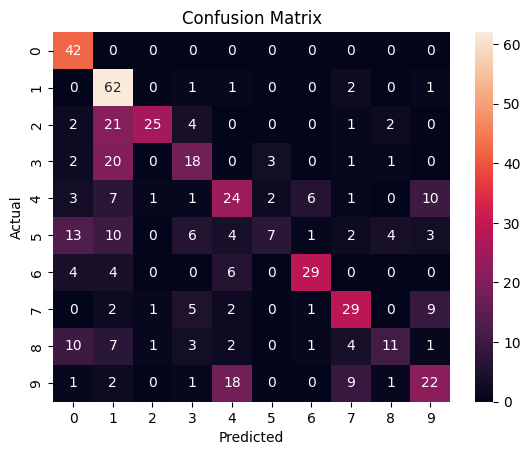

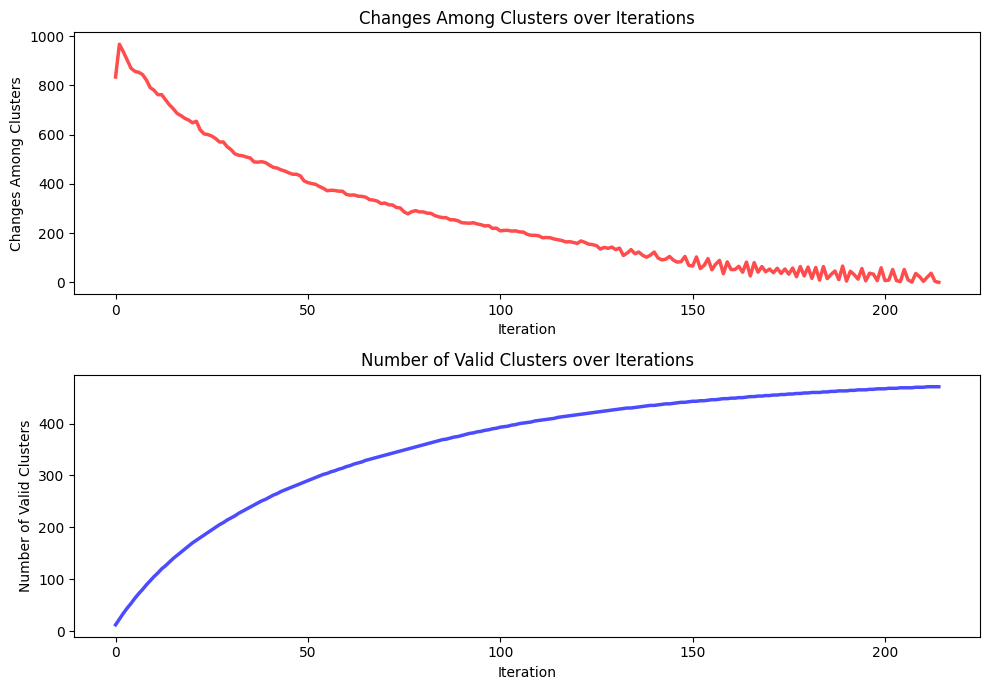

In [7]:
art = AdaptiveResonanceTheory(
    learning_rate=0.1, 
    alpha=1, 
    epsilon=0.6
    )
art.fit(train_X, train_label)

# Predict the Classes Based on ART
pred_Y = art.predict(test_X)
art.predict_test(test_label, pred_Y)